[357, 650, 934, 1218, 1502, 1797, 2032, 2390, 2693, 2985, 3270, 3547, 3850, 4157, 4453, 4752, 5048, 5334, 5621, 5906, 6202, 6514, 6811, 7093, 7379, 7657, 7940, 8233, 8526, 8824, 9129, 9419, 9698]


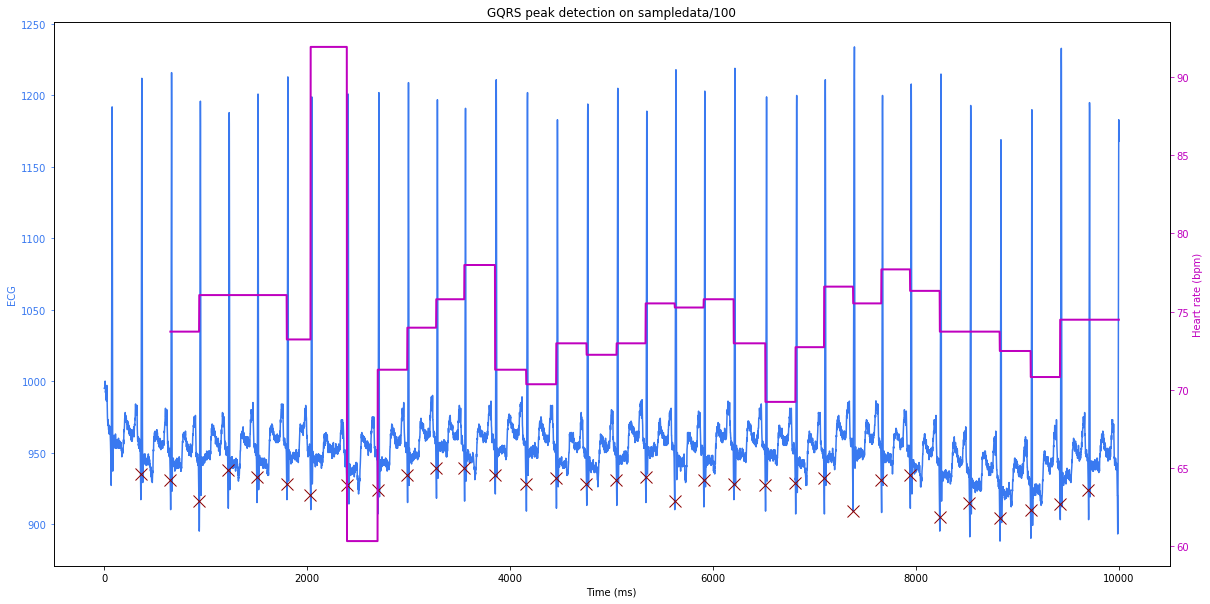

[370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560, 3863, 4171, 4466, 4765, 5061, 5347, 5634, 5919, 6215, 6527, 6824, 7106, 7393, 7670, 7953, 8246, 8539, 8837, 9142, 9432, 9710]


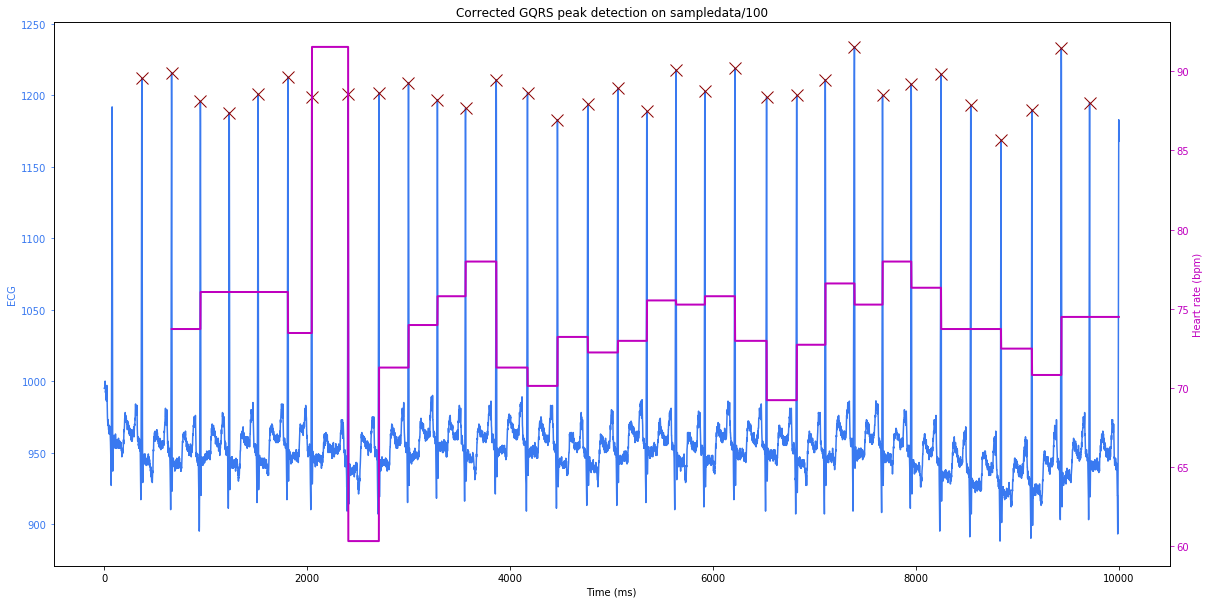

In [2]:
import matplotlib.pyplot as plt
import numpy
import wfdb

def peaks_hr(x, peaks_indexes, fs, title, figsize=(20, 10), saveto=None):
    hrs = wfdb.processing.compute_hr(length=x.shape[0], peaks_indexes=peaks_indexes, fs=fs)
    
    N = x.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(x, color='#3979f0', label='Signal')
    ax_left.plot(peaks_indexes, x[peaks_indexes], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(numpy.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()


f = 'sampledata/100'

def gqrs_plot(t, t0=0, tf=10000):
    sig, fields = wfdb.srdsamp(f, sampfrom=t0, sampto=tf, channels=[0])
    record = wfdb.rdsamp(f, sampfrom=t0, sampto=tf, channels=[0], physical=False)
    x = record.d_signals[:,0]
    fs = fields['fs']
    peaks_indexes = wfdb.processing.gqrs_detect(x=x, frequency=fs, adcgain=record.adcgain[0], adczero=record.adczero[0], threshold=1.0)
    print(peaks_indexes)
    peaks_hr(x=x, peaks_indexes=peaks_indexes, fs=fs, title="GQRS peak detection on sampledata/100")
    min_bpm = 20
    max_bpm = 230
    min_gap = fs*60/min_bpm
    max_gap = fs*60/max_bpm
    peaks_indexes = wfdb.processing.correct_peaks(x=x, peaks_indexes=peaks_indexes, min_gap=min_gap, max_gap=max_gap, smooth_window=150)
    print(sorted(peaks_indexes))
    peaks_hr(x=x, peaks_indexes=sorted(peaks_indexes), fs=fs, title="Corrected GQRS peak detection on sampledata/100")


gqrs_plot(f)